# Attempting to extract params from multi-layered samples

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from Matrix_methods.Simulate import simulate_reference, simulate_parallel
from Matrix_methods.LayeredExtractor import LayeredExtractor, LayeredExtractorNK

[((3.46+0.01j), 0.001), ((2.5+0.015j), 0.0005)]


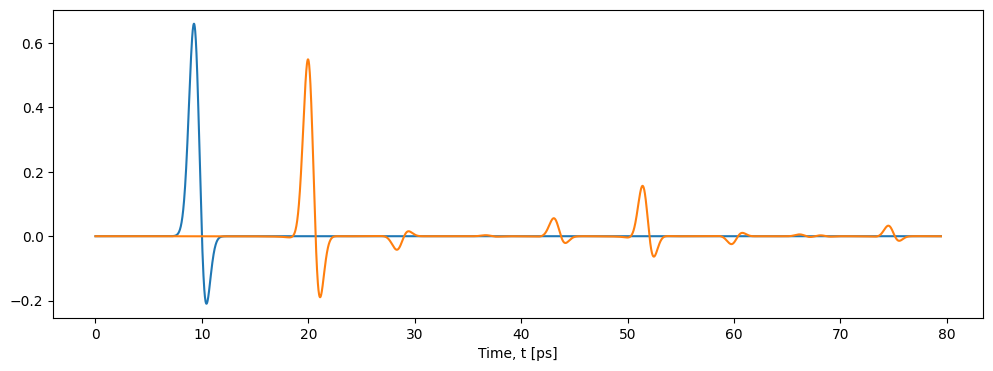

In [2]:
# Define simulation parameters
deltat = 0.0194e-12  # Time step
L = 2**12  # Number of time points

# Generate reference pulse
reference_pulse = simulate_reference(L, deltat)

n1, k1, d1 = 3.46, 0.01, 1e-3
n2, k2, d2= 2.5, 0.015, 0.5e-3

# Experimental material parameters (ground truth)
material_params_exp = [(n1+1j*k1, d1), (n2+1j*k2, d2)]

# Simulate the experimental data
t_axis = np.arange(0, L * deltat, deltat)
_, experimental_pulse = simulate_parallel(reference_pulse, material_params_exp, deltat, noise_level=0)
experimental_pulse = experimental_pulse[:L]

print(material_params_exp)
plt.figure(figsize=(12,4))
plt.plot(t_axis*1e12, reference_pulse)
plt.plot(t_axis*1e12, experimental_pulse.detach().cpu().numpy())
plt.xlabel('Time, t [ps]')
plt.show()

## Test General model to fit all 3 parameters

In [3]:
## Experimental params:
# n1, k1, d1 = 3.46, 0.01, 1e-3
# n2, k2, d2= 2.5, 0.015, 0.5e-3

layers_init = [(3.44+1j*0.015, 1.1e-3), (2.4+1j*0.017, 1e-3)]


LE = LayeredExtractor(reference_pulse, experimental_pulse, deltat, layers_init, lr=0.001)
nj,kj,dj = LE.optimize(num_iterations=1000, updates=100 , alpha=1)

optim_params = [(nj[0]+1j*kj[0], dj[0]), (nj[1]+1j*kj[1], dj[1])]

_, optimal_pulse = simulate_parallel(reference_pulse, optim_params, deltat, noise_level=0)
optimal_pulse = optimal_pulse[:L]

print(optim_params)
plt.figure(figsize=(12,4))
plt.plot(t_axis*1e12, reference_pulse)
plt.plot(t_axis*1e12, experimental_pulse.detach().cpu().numpy())
plt.plot(t_axis*1e12, optimal_pulse.detach().cpu().numpy())
plt.xlabel('Time, t [ps]')
plt.show()

Optimizing for 1000 iterations with loss multiplier 1.
Iteration 99, Loss: 0.0654071718454361, Layer 0: n=3.508385181427002, k=-0.05042325332760811, D=0.001166569534689188, Layer 1: n=2.4607059955596924, k=-0.04868674650788307, D=0.0010649659670889378
Iteration 199, Loss: 0.06260911375284195, Layer 0: n=3.5203051567077637, k=-0.08185163140296936, D=0.0011618625139817595, Layer 1: n=2.42781662940979, k=-0.08269419521093369, D=0.0011025125859305263
Iteration 299, Loss: 0.061321962624788284, Layer 0: n=3.526320457458496, k=-0.10493792593479156, D=0.0011578687699511647, Layer 1: n=2.396573781967163, k=-0.10893366485834122, D=0.0011676413705572486
Iteration 399, Loss: nan, Layer 0: n=nan, k=nan, D=nan, Layer 1: n=nan, k=nan, D=nan


KeyboardInterrupt: 

In [ ]:
plt.plot(LE.loss_history)